In [1]:
import cv2
from src import arucoAnalisis

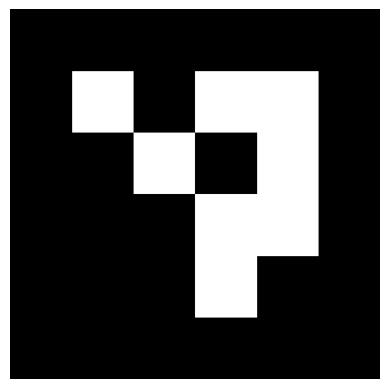

In [2]:
tool = arucoAnalisis.Toolset(cv2.aruco.DICT_4X4_50)
img = tool.generate_marker_img(0)
arucoAnalisis.cv2_imshow(img)

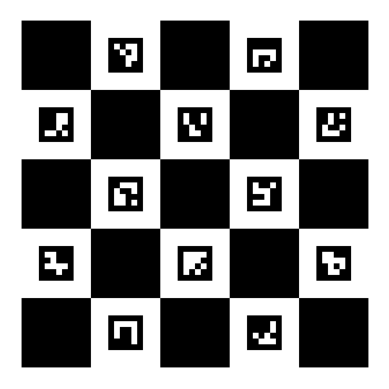

In [3]:
board, boardImg = tool.generate_board((5,5), 0.03, 0.015, 640, 20)
arucoAnalisis.cv2_imshow(boardImg)

In [4]:
imgs = [cv2.imread(f'img/blender-captures/camera-calib-0{i}.png') for i in range(1, 5)]

obsCamera = arucoAnalisis.Camera(0, 'OBS_virtual_camera')
cameraCalib, _ = obsCamera.calibrate_camera(imgs, board)
print(cameraCalib.camera_matrix)

[[1.77890156e+03 0.00000000e+00 6.41587993e+02]
 [0.00000000e+00 1.77893149e+03 3.59781829e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


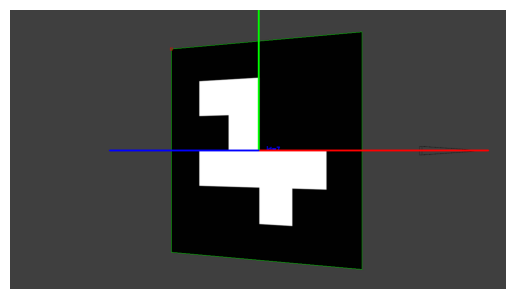

In [5]:
testImgs = [cv2.imread(f'img/blender-captures/pointer-test-{i}.png') for i in range(1, 5)]
markers, a = tool.detect_markers_calibration(testImgs[1], cameraCalibration=cameraCalib, marker_length=0.015)
arucoAnalisis.cv2_imshow(a)

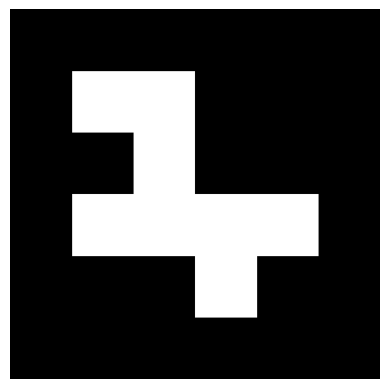

In [6]:
arucoAnalisis.cv2_imshow(markers[0].img)

In [7]:
pointer = arucoAnalisis.Segment(0, 'pointer1', markers[0])
pointer.add_landmark(relativeLocation=[[[0.015,0.0,0.0]]])

pointer.landmarks[0].__str__()

'Landmark poses: []'

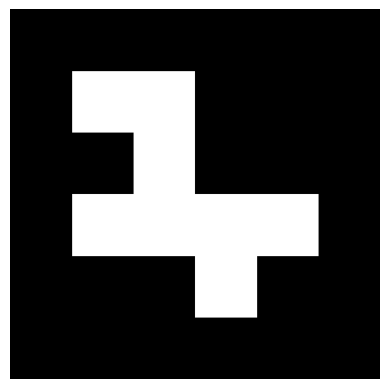

In [8]:
arucoAnalisis.cv2_imshow(pointer.marker.img)

In [9]:
pointer.landmarks[0].__str__()

'Landmark poses: []'

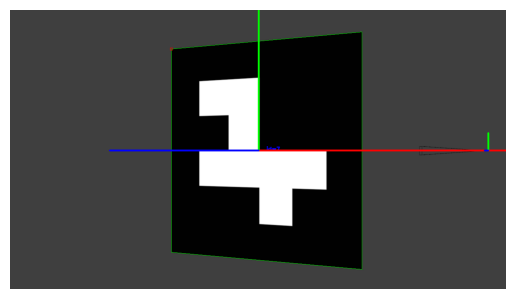

In [10]:
b = pointer.draw_landmarks(a, cameraCalib)
arucoAnalisis.cv2_imshow(b)

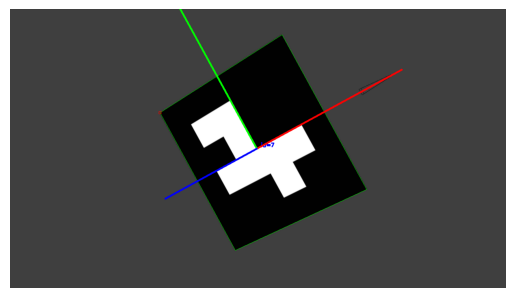

In [11]:
markers, out = tool.detect_markers_run(testImgs[2], markers, cameraCalibration=cameraCalib, marker_length=0.015)
arucoAnalisis.cv2_imshow(out)

In [12]:
print(markers[0].id, markers[0].poses)

[7] [Pose(rvec=[[[-3.04303332  0.00416656  0.82245649]]], tvec=[[[0.00070051 0.00048973 0.0456333 ]]]), Pose(rvec=[[[-2.83625084  0.73105336  0.76676355]]], tvec=[[[0.00079366 0.00056146 0.05976369]]])]


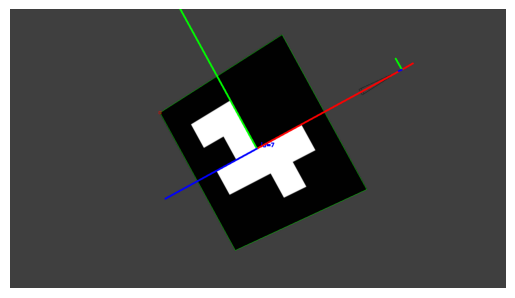

In [13]:
b = pointer.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

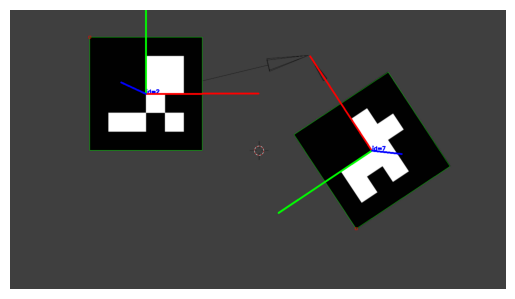

In [14]:
test2 = [cv2.imread(f'img/blender-captures/pointer-test-{i}.png') for i in range(5, 8)]
markers, out = tool.detect_markers_calibration(test2[0], cameraCalibration=cameraCalib, marker_length=0.015)
arucoAnalisis.cv2_imshow(out)

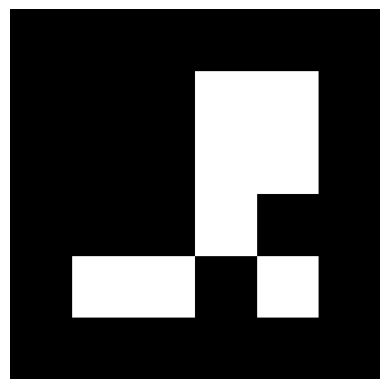

In [15]:
arucoAnalisis.cv2_imshow(markers[0].img)

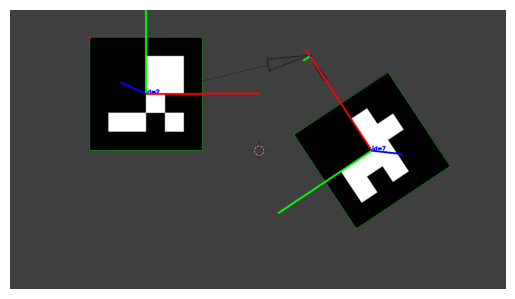

In [16]:
newPointer = arucoAnalisis.Segment(1, 'pointer2', markers[1])
newPointer.clear_landmarks()
newPointer.add_landmark(relativeLocation=[[[0.015,0.0,0.0]]])
b = newPointer.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

In [17]:
absPose = newPointer.landmarks[0].absolutePoses[-1]
print(absPose)

Pose(rvec=[[[-1.46878954  2.73532362 -0.00625226]]], tvec=[[[ 0.00813233 -0.01156455  0.08783937]]])


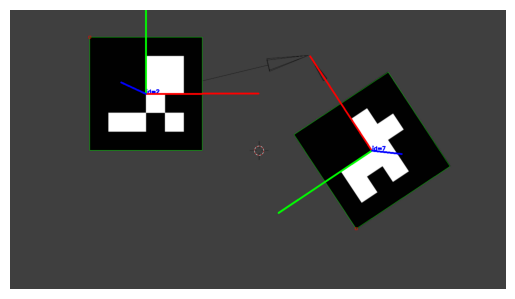

In [18]:
markers, out = tool.detect_markers_run(test2[0], markers, cameraCalibration=cameraCalib, marker_length=0.015)
arucoAnalisis.cv2_imshow(out)

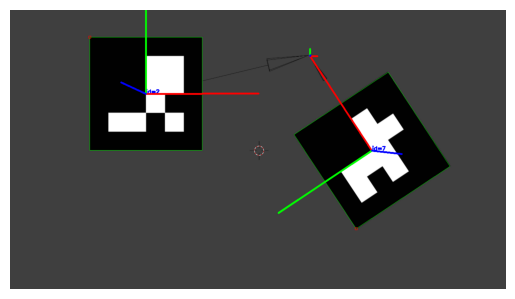

In [19]:
segment = arucoAnalisis.Segment(2, 'segment1', markers[0])
segment.clear_landmarks()
segment.add_landmark_from_absoluteLocation(pose=absPose)
b = segment.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

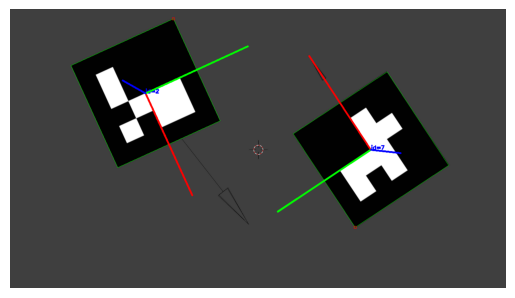

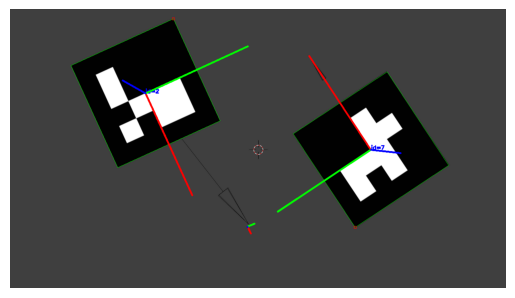

In [20]:
markers, out = tool.detect_markers_run(test2[1], markers, cameraCalibration=cameraCalib, marker_length=0.015)
arucoAnalisis.cv2_imshow(out)
b = segment.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)

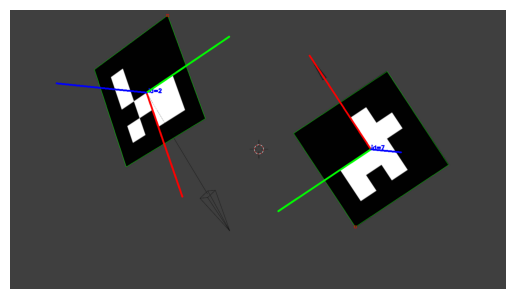

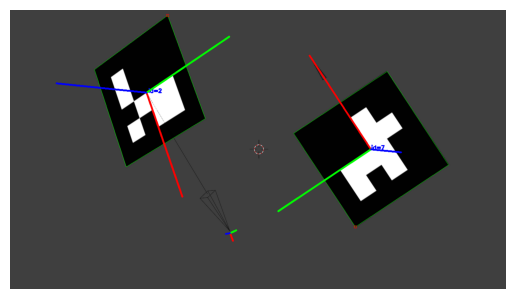

In [21]:
markers, out = tool.detect_markers_run(test2[2], markers, cameraCalibration=cameraCalib, marker_length=0.015)
arucoAnalisis.cv2_imshow(out)
b = segment.draw_landmarks(out, cameraCalib)
arucoAnalisis.cv2_imshow(b)